## Import Dependencies and Initiate Lat/Lng Ranges

In [106]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps

# Import API key
from api_keys import gkey
from api_keys import wkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
latitude = []
longitude = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        latitude.append(lat_lng[0])
        longitude.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)

603

## Perform Open Weather Map API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + wkey 

In [4]:
# Get weather information that will be used for further analysis
not_found = []
found = []
weather = []

for x in range(len(cities)):
    city = cities[x]
    new_city = city.replace(' ', '+')
    location = f"{new_city},{countries[x]}"
    city_url = f"{url}&q={location}"

    response = requests.get(city_url).json()
    try:
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        windSpeed = response['wind']['speed']
        locationLat = response['coord']['lat']
        locationLng = response['coord']['lon']
        name = response['name']
        country = response['sys']['country']
        date = response['dt']
        numId = response['id']
        information = {
            'city': name,
            'country': country,
            'ID': numId,
            'date': date,
            'temperature': temp,
            'humidity': humidity,
            'cloudiness': cloudiness,
            'wind speed': windSpeed,
            'latitude': locationLat,
            'longitude': locationLng
        }
        print(f"Location: {name}, {response['sys']['country']}")
        print(f"ID: {numId}")
        found.append(location)
        weather.append(information)
    except KeyError:
        print(f"{location} has no data. Skipping!")
        not_found.append(location)

Location: Kapaa, US
ID: 5848280
Location: Edenderry, IE
ID: 2964436
Location: Bluff, NZ
ID: 2206939
taolanaro,mg has no data. Skipping!
Location: Hilo, US
ID: 5855927
Location: Puerto Ayora, EC
ID: 3652764
Location: Tuktoyaktuk, CA
ID: 6170031
Location: College, US
ID: 5859699
Location: Shingu, JP
ID: 1847947
Location: Jamestown, SH
ID: 3370903
Location: Anadyr, RU
ID: 2127202
Location: Cape Town, ZA
ID: 3369157
Location: Carnarvon, AU
ID: 2074865
Location: Strathblane, GB
ID: 2636707
Location: Westport, IE
ID: 2960970
Location: Mehamn, NO
ID: 778707
Location: Misratah, LY
ID: 2214846
mataura,pf has no data. Skipping!
Location: Palauig, PH
ID: 1696188
grand+river+south+east,mu has no data. Skipping!
Location: Hermanus, ZA
ID: 3366880
Location: Manono, CD
ID: 209598
Location: Aklavik, CA
ID: 5882953
Location: Torbay, CA
ID: 6167817
Location: East London, ZA
ID: 1006984
Location: Longyearbyen, SJ
ID: 2729907
Location: Sao Filipe, CV
ID: 3374210
Location: Tarakan, ID
ID: 1624725
Location:

Location: Bilibino, RU
ID: 2126682
Location: Hasaki, JP
ID: 2112802
Location: Mugango, TZ
ID: 152689
Location: Mackay, AU
ID: 2159220
Location: Taoudenni, ML
ID: 2450173
xadani,mx has no data. Skipping!
Location: Sharkan, RU
ID: 495688
Location: Milledgeville, US
ID: 4209448
Location: Sao Joao da Barra, BR
ID: 3448903
Location: Puerto Quijarro, BO
ID: 3465342
Location: Bambous Virieux, MU
ID: 1106677
khonuu,ru has no data. Skipping!
Location: Brighton, US
ID: 5414941
Location: Salekhard, RU
ID: 1493197
Location: Svetlaya, RU
ID: 2015852
Location: Karratha, AU
ID: 6620339
Location: Pisco, PE
ID: 3932145
Location: Pomabamba, PE
ID: 3693468
Location: Chokurdakh, RU
ID: 2126123
Location: Itaqui, BR
ID: 3460629
Location: Marsa Matruh, EG
ID: 352733
Location: Kokoda, PG
ID: 2093691
Location: Luderitz, NA
ID: 3355672
Location: Koumac, NC
ID: 2140558
khonsar,ir has no data. Skipping!
Location: Abbeville, US
ID: 4314295
Location: Mbandaka, CD
ID: 2312895
Location: Sabha, LY
ID: 2212775
Location

Location: Dandong, CN
ID: 2037886
Location: Black Diamond, CA
ID: 5902458
zachagansk,kz has no data. Skipping!
Location: Coquimbo, CL
ID: 3893629
Location: Hami, CN
ID: 1529484
Location: Ancud, CL
ID: 3899695
hihifo,to has no data. Skipping!
Location: Curuguaty, PY
ID: 3437088
Location: Genhe, CN
ID: 2037252
Location: Makat, KZ
ID: 608872
yialos,gr has no data. Skipping!
Location: Marienburg, SR
ID: 3383570
Location: Izvestkovyy, RU
ID: 2023360
Location: Ulladulla, AU
ID: 2145554
Location: Shubarkuduk, KZ
ID: 608271
Location: Santa Isabel do Rio Negro, BR
ID: 3662489
Location: Usakos, NA
ID: 3352461
araguacu,br has no data. Skipping!
Location: Lumberton, US
ID: 4708328
Location: Tumut, AU
ID: 2145875
Location: Gandajika, CD
ID: 216449
Location: Folldal, NO
ID: 3156868
Location: Aloleng, PH
ID: 1731298
candawaga,ph has no data. Skipping!
Location: Boa Esperanca, BR
ID: 3736812
Location: Sena Madureira, BR
ID: 3662155
Location: Jacareacanga, BR
ID: 3397763
Location: Ust-Kuyga, RU
ID: 201

## Perform Google Geocoding API Calls for Locations Not Found By Weather API

In [5]:
# Performing analysis of cities that weren't found
# Pulling lat/lng from Google Geocode
print(f"Found by Open Weather Map: {len(found)}")
print(f"Not found by Open Weather Map: {len(not_found)}")
print("\n")
geocode_found = []
geocode_not_found = []

for nf in not_found:
    city = nf.split(',')[0]
    country = nf.split(',')[1]
    target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address=%s" \
    "&sensor=false&components=country:%s&key=%s" % (city, country, gkey)
    geo_data = requests.get(target_url).json()
    try:
        try:
            name = geo_data['results'][0]['formatted_address']
            lat = geo_data['results'][0]['geometry']['location']['lat']
            lng = geo_data['results'][0]['geometry']['location']['lng']
            approx = geo_data['results'][0]['partial_match']
        except KeyError:
            approx = False
        info = {
            'location' : name,
            'latitude' : lat,
            'longitude' : lng,
            'approximate' : approx
        }
        print(info)
        geocode_found.append(info)
    except:
        geocode_not_found.append(nf)

Found: 515
Not found: 88


{'location': 'Taolagnaro, Madagascar', 'latitude': -25.0225309, 'longitude': 46.9853688, 'approximate': True}
{'location': "Mata'ura, French Polynesia", 'latitude': -23.3470634, 'longitude': -149.4850445, 'approximate': False}
{'location': 'Grand River South East, Mauritius', 'latitude': -20.2888094, 'longitude': 57.78141199999999, 'approximate': False}
{'location': 'Formoso do Araguaia - State of Tocantins, 77470-000, Brazil', 'latitude': -11.8031151, 'longitude': -50.1832516, 'approximate': False}
{'location': 'Tumanny, Murmansk Oblast, Russia, 184375', 'latitude': 68.878911, 'longitude': 35.6675264, 'approximate': False}
{'location': 'Marcona District, Peru', 'latitude': -15.3439659, 'longitude': -75.0844757, 'approximate': False}
{'location': 'Solomon Islands', 'latitude': -9.64571, 'longitude': 160.156194, 'approximate': True}
{'location': 'Nizhneyansk, Sakha Republic, Russia, 678562', 'latitude': 71.450058, 'longitude': 136.1122279, 'approximate': False

{'location': 'Kazakhstan', 'latitude': 48.019573, 'longitude': 66.923684, 'approximate': True}
{'location': 'Hihifo, Tonga', 'latitude': -15.9528061, 'longitude': -173.7955818, 'approximate': False}
{'location': 'Gialos 730 01, Greece', 'latitude': 35.2349773, 'longitude': 23.6250638, 'approximate': False}
{'location': 'Araguaçu - State of Tocantins, 77475-000, Brazil', 'latitude': -12.9257328, 'longitude': -49.8300797, 'approximate': False}
{'location': 'Candawaga, Rizal, Palawan, Philippines', 'latitude': 8.848495999999999, 'longitude': 117.5378439, 'approximate': False}
{'location': 'Armação dos Búzios, State of Rio de Janeiro, Brazil', 'latitude': -22.7563906, 'longitude': -41.889042, 'approximate': False}
{'location': 'Bengkulu, Bengkulu City, Bengkulu, Indonesia', 'latitude': -3.792845099999999, 'longitude': 102.2607641, 'approximate': False}
{'location': 'Linguere, Senegal', 'latitude': 15.3961099, 'longitude': -15.1112776, 'approximate': False}
{'location': 'San Quintín, Baja C

## Perform Second Round of Open Weather Map API Calls

In [6]:
# Attempting weather search again with lat/lng from geocode of cities orignally not found
# Want to remove any chance that a city or country code misspelling/special character prevented a proper data return
# Verifying true unavailability of weather data
new_not_found = []
new_found = []
new_weather = []

for x in range(len(geocode_found)):
    lat = geocode_found[x]['latitude']
    lng = geocode_found[x]['longitude']
    location_url = f"{url}&lat={lat}&lon{lng}"

    response = requests.get(location_url).json()
    try:
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        windSpeed = response['wind']['speed']
        locationLat = response['coord']['lat']
        locationLng = response['coord']['lon']
        name = response['name']
        country = response['sys']['country']
        date = response['dt']
        numId = response['id']
        information = {
            'city': name,
            'country': country,
            'ID': numId,
            'date': date,
            'temperature': temp,
            'humidity': humidity,
            'cloudiness': cloudiness,
            'wind speed': windSpeed,
            'latitude': locationLat,
            'longitude': locationLng
        }
        print(f"Location: {name}, {response['sys']['country']}")
        print(f"ID: {numId}")
        new_found.append(location)
        new_weather.append(information)
    except KeyError:
        print(f"{geocode_found[x]['location']} has no data. Skipping!")
        new_not_found.append(location)
print("\n")
print(f"Locations Checked: {len(geocode_found)}")
print(f"New weather Results: {len(new_found)}")
print(f"Still not found: {len(new_not_found)}")
print("\n")

Taolagnaro, Madagascar has no data. Skipping!
Mata'ura, French Polynesia has no data. Skipping!
Grand River South East, Mauritius has no data. Skipping!
Formoso do Araguaia - State of Tocantins, 77470-000, Brazil has no data. Skipping!
Tumanny, Murmansk Oblast, Russia, 184375 has no data. Skipping!
Marcona District, Peru has no data. Skipping!
Solomon Islands has no data. Skipping!
Nizhneyansk, Sakha Republic, Russia, 678562 has no data. Skipping!
Yakshur-Bod'ya, Udmurt Republic, Russia, 427100 has no data. Skipping!
Chagda, Sakha Republic, Russia, 678915 has no data. Skipping!
Halalo, Wallis and Futuna has no data. Skipping!
Barentsburg, Svalbard and Jan Mayen has no data. Skipping!
Muminabad, Tajikistan has no data. Skipping!
Bajo Baudó, Choco, Colombia has no data. Skipping!
Sakaka Saudi Arabia has no data. Skipping!
Murzuq‎, Libya has no data. Skipping!
Sudan has no data. Skipping!
Ittoqqortoormiit, Greenland has no data. Skipping!
Sale'aula, Samoa has no data. Skipping!
Samusu, Sa

## Perform Mapping and Analysis of Sites Without Weather Results

In [144]:
# Further analysis of cities that weren't found
# Getting coordinates only for cities that returned an exact match on Geocoding search
approximate_cities = []
matched_cities = []
coordinates = []

for city in geocode_found:
    if city['approximate'] == True:
        approximate_cities.append(city)
    else:
        matched_cities.append(city)

for city in matched_cities:
    coordinates.append(f"{float(city['latitude'])}, {float(city['longitude'])}")

coordinates = [tuple(float(y) for y in x.split(',')) for x in coordinates]
print(coordinates)

[(-23.3470634, -149.4850445), (-20.2888094, 57.78141199999999), (-11.8031151, -50.1832516), (68.878911, 35.6675264), (-15.3439659, -75.0844757), (71.450058, 136.1122279), (58.75177799999999, 130.6163939), (-13.3436344, -176.2171202), (78.0648475, 14.2334597), (38.1058452, 70.03245), (5.3442678, -77.2864879), (29.87800309999999, 40.1043057), (25.9182262, 13.9260001), (70.48556909999999, -21.9628757), (-13.4482906, -172.3367114), (-14.0056774, -171.4299586), (68.884224, -179.4311219), (43.5569086, 69.7352437), (71.54555599999999, 52.32027799999999), (-22.4791334, -151.3509147), (7.396611799999999, 134.5690225), (48.33697129999999, -70.99959439999999), (52.9258846, -82.42889219999999), (44.964016, 78.68411449999999), (29.65483799999999, 91.140552), (-2.4506291, -54.7009228), (16.361906, -95.0169458), (66.455612, 143.2225799), (33.2811677, 50.3172249), (-22.45, -62.34999999999999), (45.4852437, 64.08186119999999), (41.717906, 82.96201599999999), (60.493056, 72.19638909999999), (69.751221, 

In [145]:
# Mapping locations of cities with exact matches in Google Geocode and Open Weather API but had no weather results
# Initialize and set maps figure 
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

# Assign the marker layer to a variable
markers = gmaps.marker_layer(
    coordinates, 
    info_box_content=[f"Location: {city['location']}" for city in matched_cities]
)

# Add the layer to the map
fig.add_layer(markers)
print(f"There were {len(geocode_not_found) + len(approximate_cities)} cities with no exact match found searching"\
     " either Google Geocoding or Open Weather Map.")
print(f"There were {len(matched_cities)} cities with no weather results, but returned an exact Google Geocoding search result.")
print(f"These {len(matched_cities)} cities are mapped below.")
fig

There were 10 cities with no exact match found searching either Google Geocoding or Open Weather Map.
There were 78 cities with no weather results, but returned an exact Google Geocoding search result.
These 78 cities are mapped below.


Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [146]:
# Getting a list of countries for the cities without returned weather data
loc_name_split = []
no_weather_country_list = []

# Clean-up locations names collected from Geocode search
# There is a variety of naming conventions pulled from Geocoding (city, country, postal code)
# Splitting each name to eventually pull out the country name
for city in matched_cities:
    loc_name_split.append(city['location'].replace(', ', ',').split(','))

# Country names are either the final item in list or second to last with postal code being the last
for city in loc_name_split:
    country = city[len(city)-1]
    try:
        int(country)
        country = city[len(city)-2]
        no_weather_country_list.append(country)
    except ValueError:
        no_weather_country_list.append(country)

# On rare occasion the name collected from the Geocode search is not comma separated
# (eg: Sakaka Saudi Arabia instead of Sakaka, Saudi Arabia)
# Doing a spot manual clean-up of such instances
# print(no_weather_country_list)
no_weather_country_list[11]="Saudi Arabia"

# Getting counts for unique countries in list using numpy
unique, counts = np.unique(no_weather_country_list, return_counts=True)

country_counts = {
    'Country' : list(unique), 
    'No Weather Count' : list(counts)
}

# Inserting count data into pandas dataframe
no_weather_df = pd.DataFrame(country_counts).set_index('Country')
no_weather_df.head()

,No Weather Count
Country,
Algeria,2
Australia,1
Brazil,5
Bulgaria,1
Canada,5


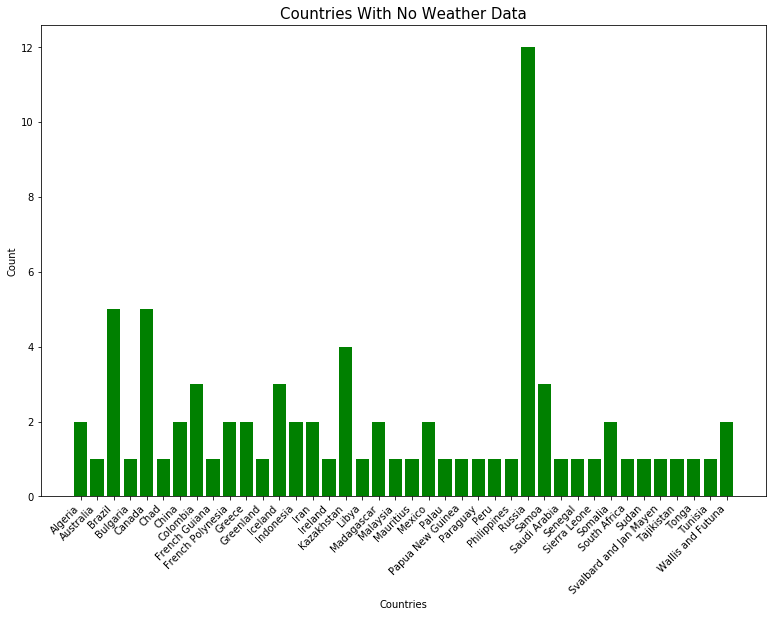

In [147]:
label = no_weather_df.index
index = np.arange(0, len(label), 1)

plt.bar(no_weather_df.index, no_weather_df['No Weather Count'], align='center', color='g')
plt.xlabel("Countries", fontsize=10)
plt.xticks(index, label, rotation=45, fontsize=10, horizontalalignment='right')
plt.ylabel("Count", fontsize=10)
plt.title("Countries With No Weather Data", fontsize=15)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 8.67
plt.show()

## Perform Analysis of Cities With Returned Weather Data

In [150]:
weather_df = pd.DataFrame(weather)
weather_df.head()

,ID,city,cloudiness,country,date,humidity,latitude,longitude,temperature,wind speed
0,5848280,Kapaa,90,US,1535043360,93,22.08,-159.32,78.49,21.92
1,2964436,Edenderry,40,IE,1535045400,71,53.34,-7.05,58.17,20.80
2,2206939,Bluff,64,NZ,1535045782,100,-46.60,168.33,48.46,10.42
3,5855927,Hilo,90,US,1535044080,93,19.71,-155.08,77.00,6.93
4,3652764,Puerto Ayora,75,EC,1535043600,61,-0.74,-90.35,78.80,23.04


Text(0,0.5,'Temperature (F)')

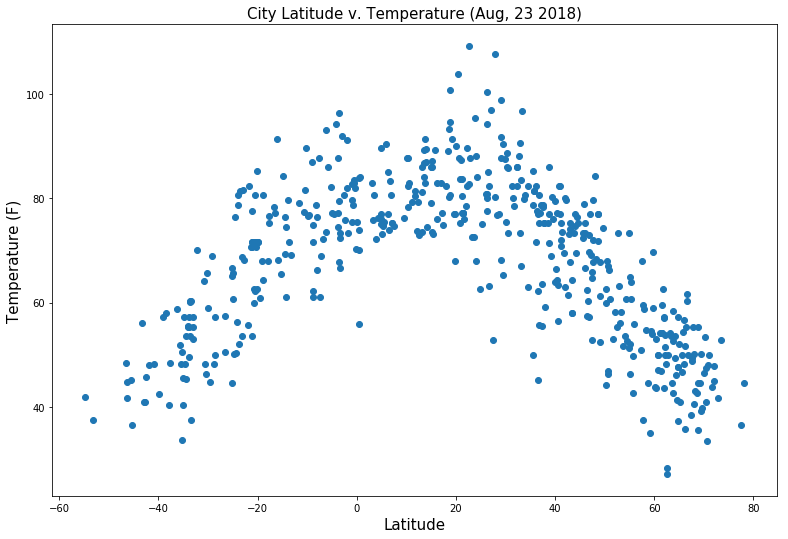

In [162]:
plt.scatter(weather_df['latitude'], weather_df['temperature'])
plt.title('City Latitude v. Temperature (Aug, 23 2018)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Temperature (F)', fontsize=15)

Text(0,0.5,'Humidity (%)')

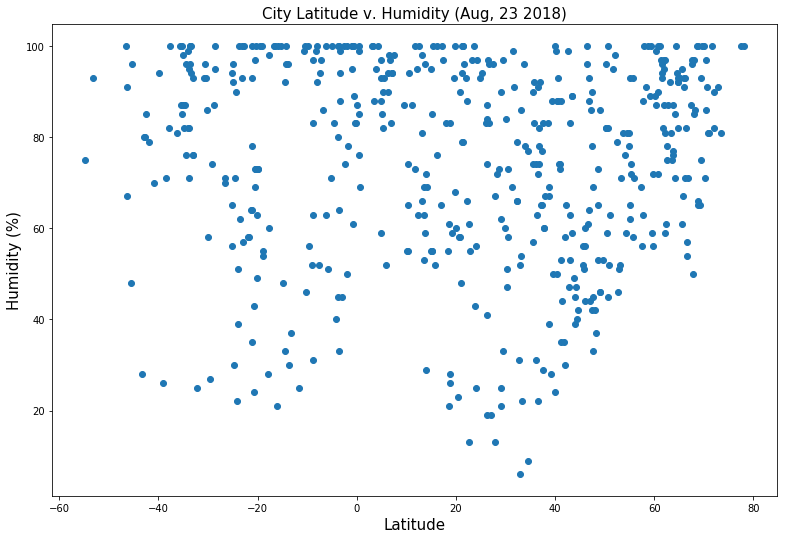

In [161]:
plt.scatter(weather_df['latitude'], weather_df['humidity'])
plt.title('City Latitude v. Humidity (Aug, 23 2018)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity (%)', fontsize=15)

Text(0,0.5,'Cloudiness (%)')

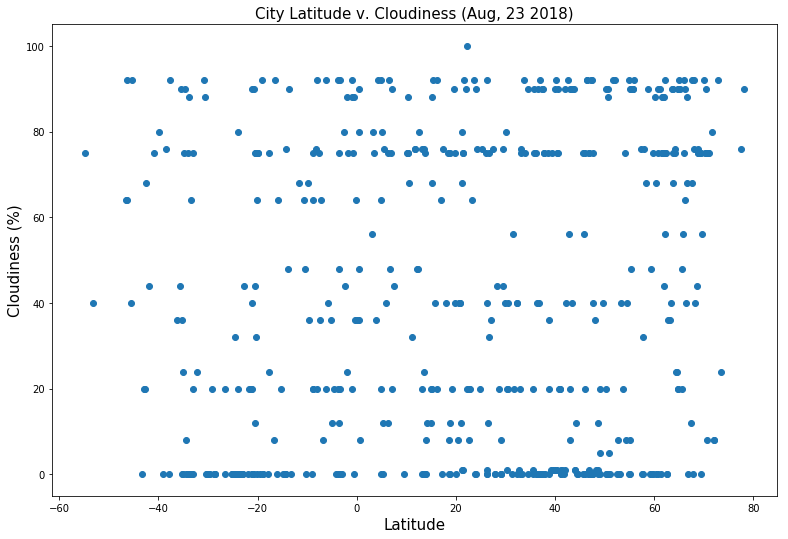

In [163]:
plt.scatter(weather_df['latitude'], weather_df['cloudiness'])
plt.title('City Latitude v. Cloudiness (Aug, 23 2018)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness (%)', fontsize=15)

Text(0,0.5,'Wind Speed (mph)')

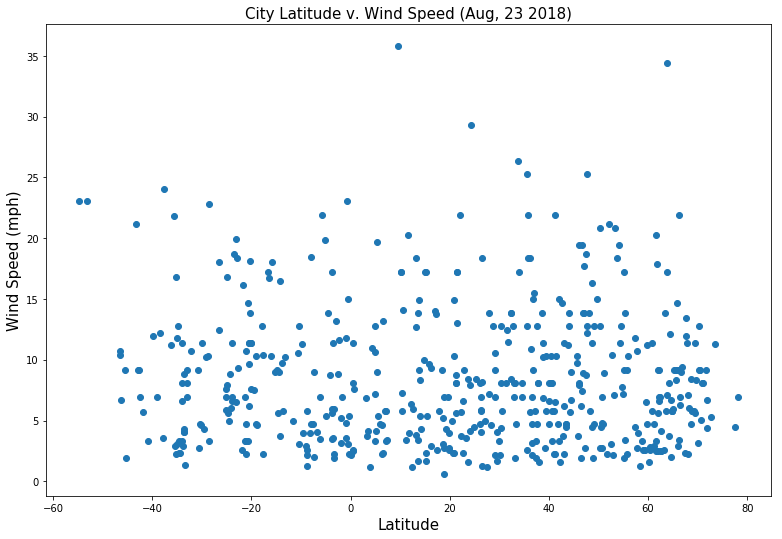

In [164]:
plt.scatter(weather_df['latitude'], weather_df['wind speed'])
plt.title('City Latitude v. Wind Speed (Aug, 23 2018)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed (mph)', fontsize=15)